In [1]:
import os
import sys
import numpy as np
import torch
from diffusers import AutoPipelineForText2Image
from diffusers import StableDiffusionPipeline, UNet2DConditionModel
sys.path.append('/raid/s2265822/diffusion-models-moe/sparsity')
from relufy_model import find_and_change_geglu 
from diffusers.pipelines.stable_diffusion import safety_checker

In [2]:
def sc(self, clip_input, images) :
    return images, [False for i in images]

# edit StableDiffusionSafetyChecker class so that, when called, it just returns the images and an array of True values
safety_checker.StableDiffusionSafetyChecker.forward = sc

In [3]:
fine_tuned_unet = '../../diffusers/examples/text_to_image/relufied-stable-diffusion-v1-5/checkpoint-14000/'
gpu = 7

In [4]:
unet = UNet2DConditionModel.from_pretrained(fine_tuned_unet + "unet", torch_dtype=torch.float16)

/home/s2265822/Workspace/.conda/envs/moe/lib/python3.10/site-packages/diffusers/models/lora.py:384: FutureWarning: `LoRACompatibleLinear` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleLinear` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleLinear", "1.0.0", deprecation_message)
/home/s2265822/Workspace/.conda/envs/moe/lib/python3.10/site-packages/diffusers/models/lora.py:300: FutureWarning: `LoRACompatibleConv` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleConv` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleConv", "1.0.0", deprecation_message)


In [5]:
unet = find_and_change_geglu(unet)
model = StableDiffusionPipeline.from_pretrained('runwayml/stable-diffusion-v1-5', torch_dtype=torch.float16)
model = model.to(gpu)

Relu test passed
Number of changed modules: 16


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [26]:
ann = 'a photo of a man'
torch.manual_seed(0)
np.random.seed(0)
image = model(ann).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

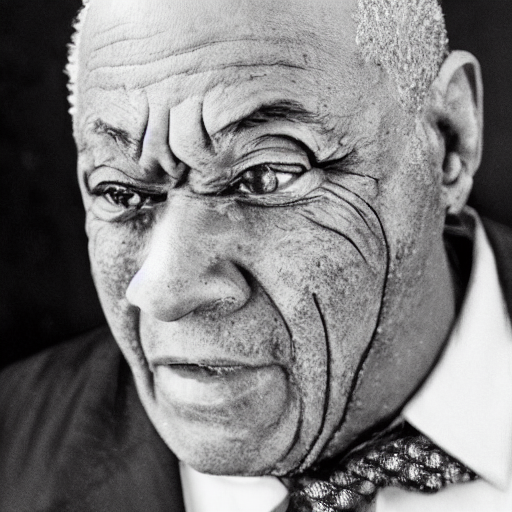

In [27]:
image

In [22]:
ann = 'a photo of a cat carcass'
torch.manual_seed(1)
np.random.seed(1)
image = model(ann, safety_checker=StableDiffusionSafetyChecker()).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

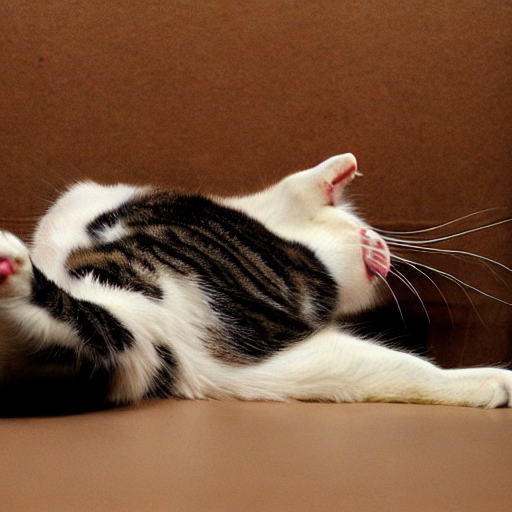

In [23]:
image